# Import Library

In [ ]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for deeplearning
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

# Libraries for image processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from IPython.display import Image

# Libraries for interacting with folder and files
import os

In [ ]:
# Import the 'drive' module from the 'google.colab' package
from google.colab import drive

# Mount the Google Drive to the '/content/drive' directory in the Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Clear the TensorFlow session and free up any resources associated with it
K.clear_session()

# Import Zip File

In [ ]:
# Import the 'zipfile' module 
import zipfile

# Define the path of the ZIP file to be extracted
zip_file_path = '/content/drive/MyDrive/Capstone Project/Data Kucing/archive (11).zip'

# Define the destination path where the extracted files will be saved
extract_path = '/content/drive/MyDrive/Capstone Project/Data Kucing/extracted'

# Open the ZIP file in read mode using the 'ZipFile' object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the ZIP file to the specified destination path
    zip_ref.extractall(extract_path)


# Check Data

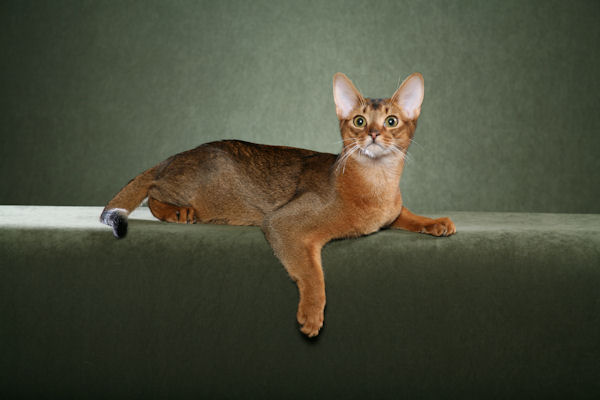

In [ ]:
# View one of the images
Image('/content/drive/My Drive/Capstone Project/Data Kucing/extracted/Gano-Cat-Breeds-V1_1/Abyssinian/Abyssinian_1.jpg')

# Data Manipulation

In [ ]:
# Define the path to the folder containing the extracted cat breed images
folder_path = '/content/drive/MyDrive/Capstone Project/Data Kucing/extracted/Gano-Cat-Breeds-V1_1'

# Get the list of all folders (breed names) in the specified folder
breeds_folder_name = os.listdir(folder_path)

# Create an empty list to store only the breed names
breeds_name_only = []

# Iterate through each folder (breed name) in the list
for breed in breeds_folder_name:
    # Get the full path of the breed folder
    breed_folder_path = os.path.join(folder_path, breed)
    
    # Check if the path is a directory (a folder)
    if os.path.isdir(breed_folder_path):
        # If it is a directory, append the breed name to the list
        breeds_name_only.append(breed)

# Print the first 15 breed names
print(breeds_name_only[:15])


['Abyssinian', 'American Bobtail', 'American Shorthair', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Egyptian Mau', 'Maine Coon', 'Persian', 'Ragdoll', 'Russian Blue', 'Siamese', 'Sphynx', 'Tuxedo']


In [ ]:
# Define empty list to contain the images and labels
X = []
y = []

# Define the folder's full path
full_paths = [os.path.join(folder_path, breed) for breed in breeds_name_only if os.path.isdir(os.path.join(folder_path, breed))]

# Store img file name and label in X and y
for i, path in enumerate(full_paths):
    for img in os.listdir(path):
        X.append(os.path.join(path, img))
        y.append(breeds_name_only[i])

In [ ]:
# Import the 'random' module
import random

# Combine the X and y lists into a single list of tuples
img_label_combined = list(zip(X, y))

# Shuffle the list of tuples randomly
random.shuffle(img_label_combined)

# Unpack the shuffled list of tuples back into X and y
X[:], y[:] = zip(*img_label_combined)

In [ ]:
from collections import Counter

# Create a Counter object to count the occurrences of each value in y
counter = Counter(y)

# Iterate over the items in the counter and print the value and count
for value, count in counter.items():
    print(f"{value}: {count}")

Abyssinian: 375
Ragdoll: 375
Bengal: 375
Siamese: 375
American Bobtail: 375
Birman: 375
Sphynx: 375
Persian: 375
Tuxedo: 375
Bombay: 375
American Shorthair: 375
British Shorthair: 375
Maine Coon: 375
Russian Blue: 375
Egyptian Mau: 375


In [ ]:
# Check the number of rows in X and y\
print('The number of data in X:', len(X))
print('The number of data in y:', len(y))

The number of data in X: 5625
The number of data in y: 5625


In [ ]:
# Take a subset of data (10k rows)
X = X[:5000]
y = y[:5000]

# Encode Label

In [ ]:
# Import the 'LabelEncoder' class from the 'sklearn.preprocessing' module
from sklearn.preprocessing import LabelEncoder

# Initialize an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the label data using the LabelEncoder
y_ohe = label_encoder.fit_transform(y)

# Prepare Train, Validation, and Test Data

In [ ]:
# Import the necessary functions and classes
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Convert the image files to arrays and resize them to the target size
image_data = np.array([img_to_array(load_img(image_file, target_size=(299, 299))) for image_file in X])

In [ ]:
# Import the garbage collector module
import gc

# Delete variables X and y from memory
del X
del y

# Collect garbage to free up memory space
gc.collect()

16

In [ ]:
# Split the image_data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(image_data, y_ohe, test_size=0.1, stratify=np.array(y_ohe), random_state=0)

# Clear some space from the memory

del image_data
gc.collect()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=np.array(y_train), random_state=0)

In [ ]:
# Print the sizes of the train, validation, and test datasets
print('Train Dataset Size: ', X_train.shape)
print('Validation Dataset Size: ', X_val.shape)
print('Test Dataset Size: ', X_test.shape)

# Print the sizes of the train, validation, and test labels
print('Train Label Size: ', len(y_train))
print('Validation Label Size: ', len(y_val))
print('Test Label Size: ', len(y_test))

Train Dataset Size:  (4050, 299, 299, 3)
Validation Dataset Size:  (450, 299, 299, 3)
Test Dataset Size:  (500, 299, 299, 3)
Train Label Size:  4050
Validation Label Size:  450
Test Label Size:  500


# Image Augmentation

In [ ]:
# Define some hyperparameters
batch_size = 32
epochs = 20

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the train generator and apply image augmentations
train_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                          rotation_range=30,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)

# Create a generator for the train dataset
train_generator = train_data_generator.flow(X_train, y_train, shuffle=False, batch_size=batch_size)

# Define the validation generator
validation_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create a generator for the validation dataset
validation_generator = validation_data_generator.flow(X_val, y_val, shuffle=False, batch_size=batch_size)

# Model Training

In [ ]:
K.clear_session()

In [ ]:
num_output = len(breeds_name_only)
print(num_output)

15


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

# Import the Inception V3 original model, but discard the top dense layer for original classification
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))

# Add the additional layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1024, kernel_regularizer=l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=512, kernel_regularizer=l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=num_output, kernel_regularizer=l1(0.01), activation='softmax')
])

# Freeze the pretrained Inception V3 layers
model.layers[0].trainable = True

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
print('Number of trainable weights after freezing the base layer:', len(model.trainable_weights))

Number of trainable weights after freezing the base layer: 194


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                        

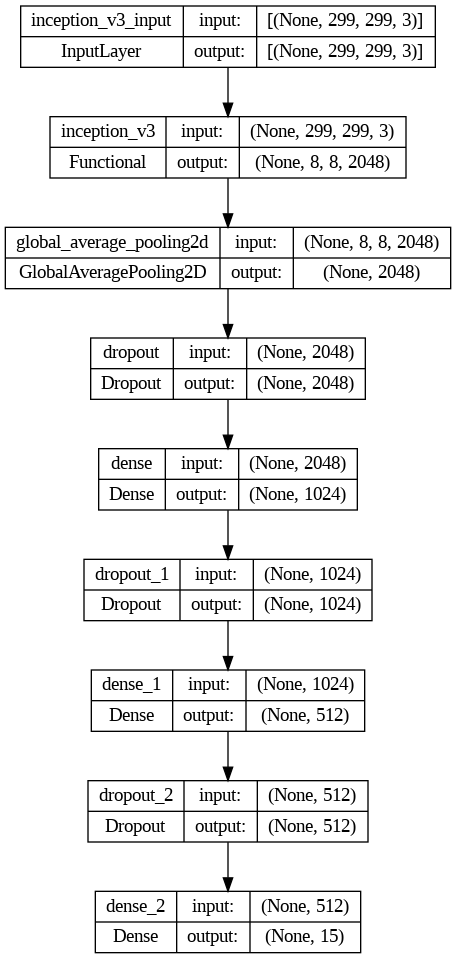

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='inception_model_modified.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Define the step_size to use
train_step_size = X_train.shape[0] // batch_size
validation_step_size = X_val.shape[0] // batch_size

# Train the model
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_step_size,
                    validation_data=validation_generator,
                    validation_steps=validation_step_size,
                    epochs=epochs)

<ipython-input-28-4a6a34c5f9eb>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/20
126/126 [==============================] - 175s 878ms/step - loss: 25.0725 - accuracy: 0.3482 - val_loss: 22.2727 - val_accuracy: 0.6964
Epoch 2/20
126/126 [==============================] - 102s 811ms/step - loss: 20.9480 - accuracy: 0.6797 - val_loss: 19.2145 - val_accuracy: 0.7366
Epoch 3/20
126/126 [==============================] - 103s 817ms/step - loss: 17.7999 - accuracy: 0.7626 - val_loss: 16.4956 - val_accuracy: 0.7634
Epoch 4/20
126/126 [==============================] - 102s 808ms/step - loss: 15.0606 - accuracy: 0.8111 - val_loss: 13.8395 - val_accuracy: 0.8192
Epoch 5/20
126/126 [==============================] - 103s 819ms/step - loss: 12.6340 - accuracy: 0.8504 - val_loss: 11.9421 - val_accuracy: 0.7478
Epoch 6/20
126/126 [==============================] - 106s 840ms/step - loss: 10.5422 - accuracy: 0.8805 - val_loss: 10.0167 - val_accuracy: 0.7902
Epoch 7/20
126/126 [==============================] - 105s 835ms/step - loss: 8.7390 - accuracy: 0.8960 - val_lo

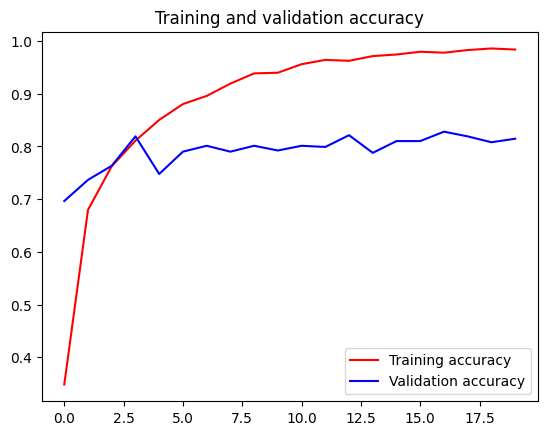

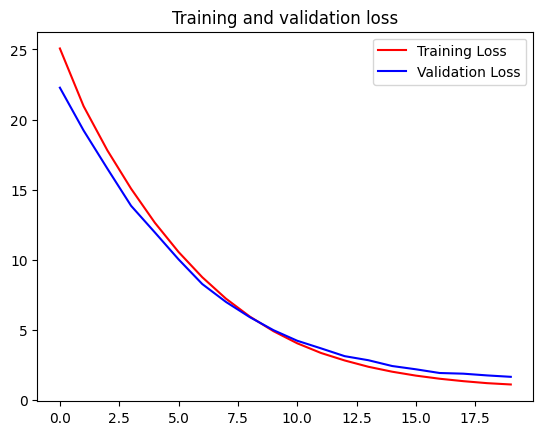

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


# Model Prediction Results on Test Set

In [ ]:
# Scale the X_test
X_test_rescaled = X_test / 255.0

# Predictions
predictions = model.predict(X_test_rescaled)

16/16 [==============================] - 8s 335ms/step


In [ ]:
# Get the highest probability indices for every test data
highest_prob_indices = np.argmax(predictions, axis=1)

# Inverse transform to get the label name
prediction_labels = label_encoder.inverse_transform(highest_prob_indices)

# Get the true labels of the test data
true_labels = label_encoder.inverse_transform(y_test)

In [ ]:
# Show the predicted labels and the corresponding true labels side by side in a dataframe
df_test_results = pd.DataFrame({'True': true_labels, 'Model Prediction': prediction_labels})
df_test_results

,True,Model Prediction
0,Egyptian Mau,Egyptian Mau
1,British Shorthair,Russian Blue
2,Birman,Birman
3,Russian Blue,Russian Blue
4,Birman,Birman
...,...,...
495,Tuxedo,Tuxedo
496,Sphynx,Sphynx
497,Siamese,Siamese
498,Russian Blue,Russian Blue


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Check the accuracy score on the test set
print('Accuracy:', accuracy_score(true_labels, prediction_labels))

# Check the precision score on the test set
print('Precision:', precision_score(true_labels, prediction_labels, average='weighted'))

# Check the recall score on the test set
print('Recall:', recall_score(true_labels, prediction_labels, average='weighted'))

# Check the f1 score on the test set
print('F1:', f1_score(true_labels, prediction_labels, average='weighted'))

Accuracy: 0.788
Precision: 0.8139508179978409
Recall: 0.788
F1: 0.7867554972279315


In [ ]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, prediction_labels)

# Get the TP, TN, FP, FN values from the confusion matrix
TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]

# Displays TP, TN, FP, FN values
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


True Positive (TP): 22
True Negative (TN): 24
False Positive (FP): 2
False Negative (FN): 0


# Load Model

In [ ]:
import os
from tensorflow.keras.models import load_model

# H5 format
model.save('/content/drive/MyDrive/Capstone Project/Data Kucing/Model/Cat Breed Classification/cat_breed_model_v2.h5')

In [ ]:
model.save('/content/drive/MyDrive/Capstone Project/Data Kucing/Model/Cat Breed Classification/cat_breed_model_v2')

In [ ]:
# TFLite format
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/Capstone Project/Data Kucing/Model/Cat Breed Classification/cat_breed_model_v2')
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert();

import pathlib

tflite_model_file = pathlib.Path('/content/drive/MyDrive/Capstone Project/Data Kucing/Model/Cat Breed Classification/cat_breed_model_v2.tflite')
tflite_model_file.write_bytes(tflite_model)

24728944